# IML - Work2

In [2]:
# !git clone https://github.com/gusseppe/master_artificial_intelligence
# !cp -r /content/master_artificial_intelligence/Introduction_to_Machine_Learning/deliverables/iml/* .

In [3]:
import sys
sys.path.append("..") # This will allow to fix import issues.[to be changed]

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats

import tools.eda as eda
import tools.preprocess as prep

path = '../datasets/splice.arff'

# Parse into pandas DataFrame
df = eda.read_arff(path)
df_original = df.copy()
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,b'C',b'C',b'A',b'G',b'C',b'T',b'G',b'C',b'A',b'T',...,b'G',b'C',b'C',b'A',b'G',b'T',b'C',b'T',b'G',b'EI'
1,b'A',b'G',b'A',b'C',b'C',b'C',b'G',b'C',b'C',b'G',...,b'T',b'G',b'C',b'C',b'C',b'C',b'C',b'G',b'C',b'EI'
2,b'G',b'A',b'G',b'G',b'T',b'G',b'A',b'A',b'G',b'G',...,b'A',b'C',b'G',b'G',b'G',b'G',b'A',b'T',b'G',b'EI'
3,b'G',b'G',b'G',b'C',b'T',b'G',b'C',b'G',b'T',b'T',...,b'G',b'T',b'T',b'T',b'T',b'C',b'C',b'C',b'C',b'EI'
4,b'G',b'C',b'T',b'C',b'A',b'G',b'C',b'C',b'C',b'C',...,b'C',b'T',b'T',b'G',b'A',b'C',b'C',b'C',b'T',b'EI'


In [4]:
target = 'Class'
features = [col for col in df.columns if col != target]

## Encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = pd.DataFrame(label_encoder.fit_transform(df[target]), 
                         columns=['Class'])

df_OHE = prep.encode(df[features])
df_OHE.head()


Feature: attribute_1          | # categories: 5
Feature: attribute_2          | # categories: 5
Feature: attribute_3          | # categories: 4
Feature: attribute_4          | # categories: 4
Feature: attribute_5          | # categories: 4
Feature: attribute_6          | # categories: 4
Feature: attribute_7          | # categories: 4
Feature: attribute_8          | # categories: 4
Feature: attribute_9          | # categories: 4
Feature: attribute_10         | # categories: 4
Feature: attribute_11         | # categories: 4
Feature: attribute_12         | # categories: 4
Feature: attribute_13         | # categories: 4
Feature: attribute_14         | # categories: 5
Feature: attribute_15         | # categories: 4
Feature: attribute_16         | # categories: 4
Feature: attribute_17         | # categories: 4
Feature: attribute_18         | # categories: 4
Feature: attribute_19         | # categories: 5
Feature: attribute_20         | # categories: 5
Feature: attribute_21         | # catego

,attribute_1_b'A',attribute_1_b'C',attribute_1_b'D',attribute_1_b'G',attribute_1_b'T',attribute_2_b'A',attribute_2_b'C',attribute_2_b'D',attribute_2_b'G',attribute_2_b'T',...,attribute_59_b'A',attribute_59_b'C',attribute_59_b'G',attribute_59_b'N',attribute_59_b'T',attribute_60_b'A',attribute_60_b'C',attribute_60_b'G',attribute_60_b'N',attribute_60_b'T'
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## PCA (own implementation)


In [6]:
X = df_OHE.values.T
N = X.shape[1]
d = X.shape[0]

In [7]:
means = np.array(np.mean(X, axis=1)).reshape((d,1))


In [8]:
B = X - ( means  @  np.ones((1,N)))

cov = (B @ B.T) * (1/(N-1))  
# cov = np.cov(X)

In [9]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
print(X.T[:5,:5])

[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [10]:
values, vecs = np.linalg.eig(cov)

In [11]:
idx = values.argsort()[::-1]   
eigenvalues = values[idx]

# Sort eigenvectors w.r.t. eigenvalues
A = vecs[:,idx]

In [12]:
# Take 2 principal components
Y = A.T @ X
Y.shape

(287, 3190)

/home/guess/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


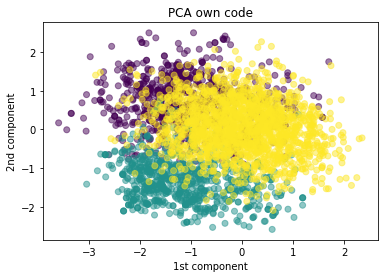

In [13]:
plt.scatter(Y[0,:], Y[1,:],c=y_encoded[target], alpha=0.5)
plt.title('PCA own code')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [14]:
# Reconstruct PCA to real data

X_reconstruct = np.linalg.inv(A.T) @ Y

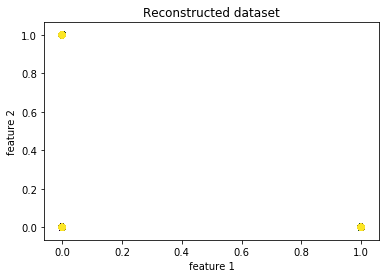

In [15]:
plt.scatter(X_reconstruct[0,:], X_reconstruct[1,:],c=y_encoded[target], alpha=0.5)
plt.title('Reconstructed dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

### PCA Sklearn

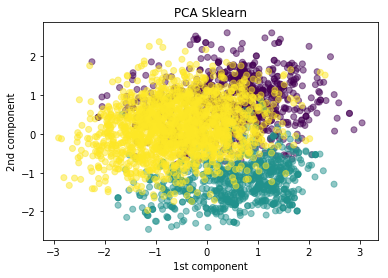

Text(0.5, 0, 'X3')

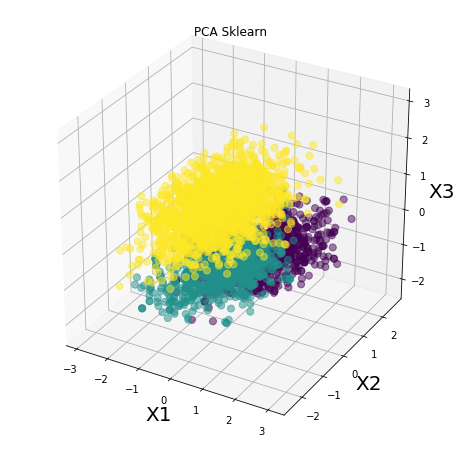

In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

sk_pca = PCA(n_components = 287)
sk_pca.fit(X.T)
X_pca = sk_pca.transform(X.T)

plt.scatter(X_pca[:,0], X_pca[:,1],c=y_encoded[target], alpha=0.5)
plt.title('PCA Sklearn')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = X_pca[:, 0]
_y = X_pca[:, 1]
z = X_pca[:, 2]

ax.scatter(x, _y, z, c=y_encoded[target], s=50, cmap='viridis', alpha=0.5)
ax.set_title('PCA Sklearn')
ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_zlabel('X3', fontsize=20)


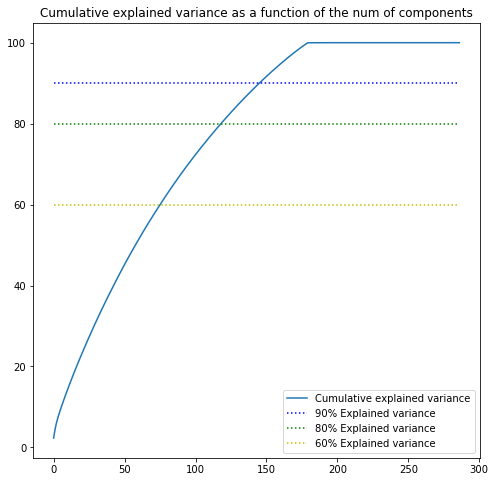

In [17]:
from tools import eda

fig = plt.figure(figsize=(8, 8))
eda.cum_variance(sk_pca.explained_variance_ratio_)

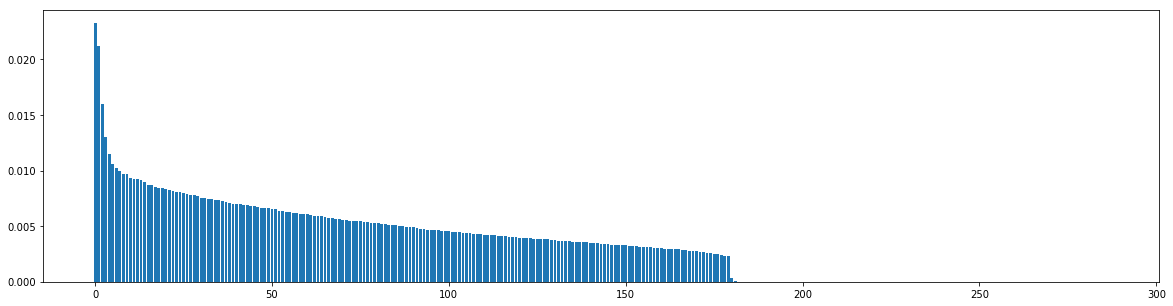

In [18]:
fig = plt.figure(figsize=(20, 5))
list_components = list(range(sk_pca.n_components_))
plt.bar(list_components, sk_pca.explained_variance_ratio_)
plt.show()

### K-Prototypes with PCA (n=2)


#### No PCA


In [19]:
from cluster.kprototypes import KPrototypes
from cluster.metrics import get_metrics, rename_labels
from sklearn.metrics import adjusted_rand_score

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
cat_features = list(range(len(features)))
for r in range(25):
  kp = KPrototypes(n_clusters=3, cat_features=cat_features, random_state=r)
  kp.fit(df_original[features].values)
  clusters = kp.labels
  score = adjusted_rand_score(df_original[target], clusters)
  if score > best_score:
    best_clusters = clusters
    best_centroids = kp.centroids
    best_score = score 
    best_r = r
r_kproto = best_r
kprototypes_clusters = best_clusters
best_score

/home/guess/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.08532606252603088

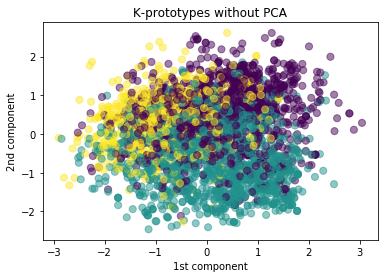

In [20]:
# pca_df = pd.DataFrame(pca.transform(df_OHE[features_OHE]))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kprototypes_clusters,
            s=50, cmap='viridis', alpha=0.5);
plt.title('K-prototypes without PCA')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

#### With PCA


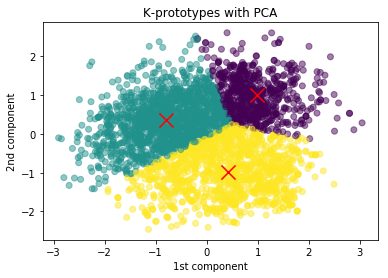

(3190,) (3190,) (3190,)


{'ars': 0.3681665609774436,
 'purity': 0.7401253918495297,
 'db': 0.8901165507651365,
 'f-measure': 0.7401253918495297,
 'silhouette': 0.34955416255099925}

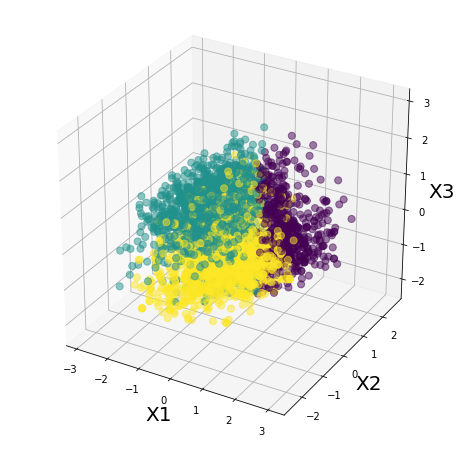

In [21]:
from cluster.kprototypes import KPrototypes
from cluster.metrics import get_metrics, rename_labels

sk_pca = PCA(n_components = 2)
X_pca = sk_pca.fit_transform(X.T)

kproto = KPrototypes(n_clusters=3, cat_features=[])
kproto.fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1],c=kproto.labels, alpha=0.5)
plt.scatter(kproto.centroids[:,0], kproto.centroids[:,1], marker='x', c='r', s=200);
plt.title('K-prototypes with PCA')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, _y, z, c=kproto.labels, s=50, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_zlabel('X3', fontsize=20)


true_labels = np.array(y_encoded[target])
pred = rename_labels(true_labels, kproto.labels)
print(kproto.labels.shape, true_labels.shape, pred.shape)

get_metrics(true_labels, pred, X=X_pca, alg='kproto')

In [22]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score

print('With PCA')
print(confusion_matrix(y_encoded[target], rename_labels(y_encoded[target], kproto.labels)))
print(accuracy_score(y_encoded[target], rename_labels(y_encoded[target], kproto.labels)))

print('\nWithout PCA')
print(confusion_matrix(y_encoded[target], rename_labels(y_encoded[target], best_clusters)))
print(accuracy_score(y_encoded[target], rename_labels(y_encoded[target], best_clusters)))

With PCA
[[ 468   68  231]
 [  13  747    8]
 [ 161  348 1146]]
0.7401253918495297

Without PCA
[[536 164  67]
 [129 614  25]
 [577 554 524]]
0.5247648902821317


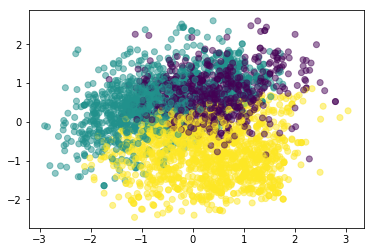

{'ars': 0.13499751480643976,
 'purity': 0.5824451410658307,
 'db': 1.4730272048539834,
 'f-measure': 0.5438871473354232,
 'silhouette': 0.18876465426321937}

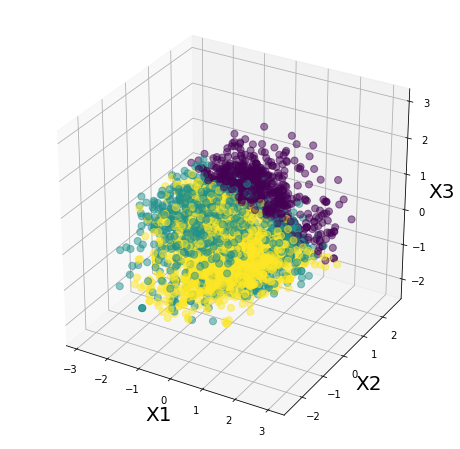

In [23]:
sk_pca = PCA(n_components = 3)
X_pca3 = sk_pca.fit_transform(X.T)

kproto = KPrototypes(n_clusters=3, cat_features=[])
kproto.fit(X_pca3)

plt.scatter(X_pca3[:,0], X_pca3[:,1],c=kproto.labels, alpha=0.5)
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x, _y, z = X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2]

ax.scatter(x, _y, z, c=kproto.labels, s=50, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_zlabel('X3', fontsize=20)

true_labels = y_encoded[target]
pred = kproto.labels
get_metrics(true_labels, pred, X=X_pca3, alg='kproto')

### SOM


In [24]:
! pip install neupy
import neupy

In [25]:
from neupy import algorithms, utils


# plt.style.use('ggplot')
utils.reproducible()



ggplot_colors = plt.rcParams['axes.prop_cycle']
colors = np.array([c['color'] for c in ggplot_colors])

# dataset = datasets.load_iris()
dataset = X.T
data = dataset
# use only two features in order
# to make visualization simpler
# data = dataset.data[:, [2, 3]]
# data = dataset[:, [0, 1]]
# dataset = X_num_scaled.values
# target = dataset.target
target_ = y_encoded[target]-1

sofm = algorithms.SOFM(
    n_inputs=data.shape[1],

    # Number of outputs defines number of features
    # in the SOFM or in terms of clustering - number
    # of clusters
    n_outputs=3,

    # In clustering application we will prefer that
    # clusters will be updated independently from each
    # other. For this reason we set up learning radius
    # equal to zero
    learning_radius=0,

    # Training step size or learning rate
    step=0.05,

    # Shuffles dataset before every training epoch.
    shuffle_data=True,

    # Instead of generating random weights
    # (features / cluster centers) SOFM will sample
    # them from the data. Which means that after
    # initialization step 3 random data samples will
    # become cluster centers
    weight='sample_from_data',

    # Shows training progress in terminal
    verbose=True,
)

sofm.train(data, epochs=15)



Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = None
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 0
[OPTION] n_inputs = 287
[OPTION] n_outputs = 3
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.05
[OPTION] verbose = True
[OPTION] weight = sample_data



#1 : [816 ms] train: 0.208629


#2 : [832 ms] train: 0.207984


#3 : [704 ms] train: 0.207984


#4 : [683 ms] train: 0.207984


#5 : [731 ms] train: 0.207984


#6 : [669 ms] train: 0.207984


#7 : [719 ms] train: 0.207984


#8 : [679 ms] train: 0.207984


#9 : [676 ms] train: 0.207984


#10 : [708 ms] train: 0.207984


#11 : [661 ms] train: 0.207984


#12 : [734 ms] train: 0.207984


#13 : [660 ms] train: 0.207984


#14 : [654 ms] train: 0.207984
#15 : [662 ms] train: 0.207984


In [26]:
sofm.predict(data)
sofm.weight.shape

(287, 3)

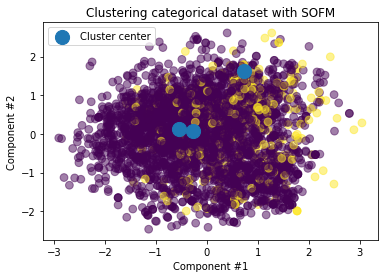

In [27]:
plt.title('Clustering categorical dataset with SOFM')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
sk_pca = PCA(n_components = 2)
X_pca = sk_pca.fit_transform(X.T)
data_ = X_pca
def get_labels(classes):
   return [0*c[0] + 1*c[1] + 2*c[2] for c in classes]
   
# print(set([ ''.join(map(str,l)) for l in sofm.predict(data)]))
plt.scatter(*data_.T, c=get_labels(sofm.predict(data)), s=60, alpha=0.5)
# plt.show()
# print(sofm.weight.T)
transformed = sk_pca.transform(sofm.weight.T)
cluster_centers = plt.scatter(*transformed.T, c=colors[0],s=200 )

plt.legend([cluster_centers], ['Cluster center'], loc='upper left')
plt.show()